# Perform KMeans on 3 data sets: 

In [20]:
# Imports: 
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install torchvision
%pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import torchvision
from tqdm import tqdm
from scipy.special import softmax


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Use Euclidean distance OR dot product to compute similarity. 
    # Can use library for distance/similarity, but have to implement own kmeans:
    # EM steps, termination criteria, etc.

# For all 3 data sets, evaluate:
    # KMeans objective for a higher K (for example double) or smaller K(for example half)
    # External clustering performance using data labels and performance metrics purity and gini index


In [3]:
# Euclidean Distance

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


In [4]:
# Dot product similarity

def dot_product(x, y):
    return np.dot(x, y)

In [5]:
# KMeans: 
    # Initialize K cluster centers
    # Assign each data point to the nearest cluster center
    # Update cluster centers
    # Repeat until convergence (no change in cluster centers)
    # Termination criteria: max iterations, no change in cluster centers, etc.

def kmeans(data, k, similarity, max_iter=10):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (best memberships closest to centers)
        clusters = [[] for _ in range(k)]
        for x in data:
            cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters


In [6]:
# Fashion Dataset:

# From torchvision:
fashion_train = torchvision.datasets.FashionMNIST(root='./fashion', train=True, download=True, transform=None)
fashion_test = torchvision.datasets.FashionMNIST(root='./fashion', train=False, download=True, transform=None)
print(len(fashion_train), len(fashion_test))

# print out number of labels:
print(len(set(fashion_train.targets.numpy())))


100%|██████████| 26421880/26421880 [00:33<00:00, 797222.90it/s] 


Extracting ./fashion\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./fashion\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 184113.64it/s]


Extracting ./fashion\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./fashion\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:05<00:00, 751418.81it/s] 


Extracting ./fashion\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./fashion\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 174837.67it/s]


Extracting ./fashion\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./fashion\FashionMNIST\raw

60000 10000
10


In [7]:
kfashion = kmeans(fashion_train.data, 10, euclidean_distance)

100%|██████████| 10/10 [07:41<00:00, 46.18s/it]


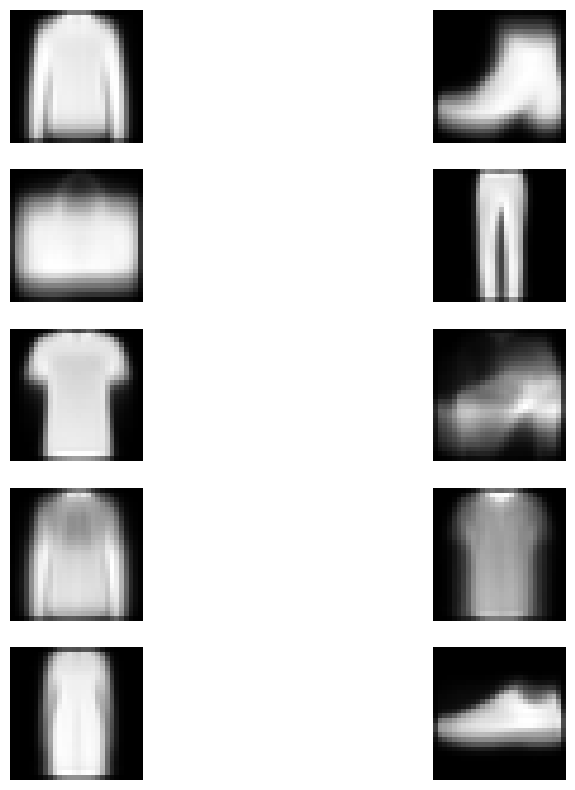

In [8]:
# Visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(kfashion[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()



In [9]:
# 20 Newsgroups Dataset:

# From torch vision:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

print(len(newsgroups_train.data), len(newsgroups_test.data))


11314 7532


In [10]:
# KMeans: 
    # Initialize K cluster centers
    # Assign each data point to the nearest cluster center
    # Update cluster centers
    # Repeat until convergence (no change in cluster centers)
    # Termination criteria: max iterations, no change in cluster centers, etc.

def kmeans_sci(data, k, similarity, max_iter=10):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step
        clusters = [[] for _ in range(k)]
        for x in data:
            cluster = min(range(k), key=lambda c: similarity(x, centers[c]))
            clusters[cluster].append(x)

        # Update cluster centers - M-step
        new_centers = [np.mean(cluster, axis=0) for cluster in clusters]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
newsgroups_train_tfidf = vectorizer.fit_transform(newsgroups_train.data).toarray()

# Ensure k is less than or equal to the number of data points
k = min(20, newsgroups_train_tfidf.shape[0])

Knewsgroups = kmeans_sci(newsgroups_train_tfidf, k, euclidean_distance)

100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


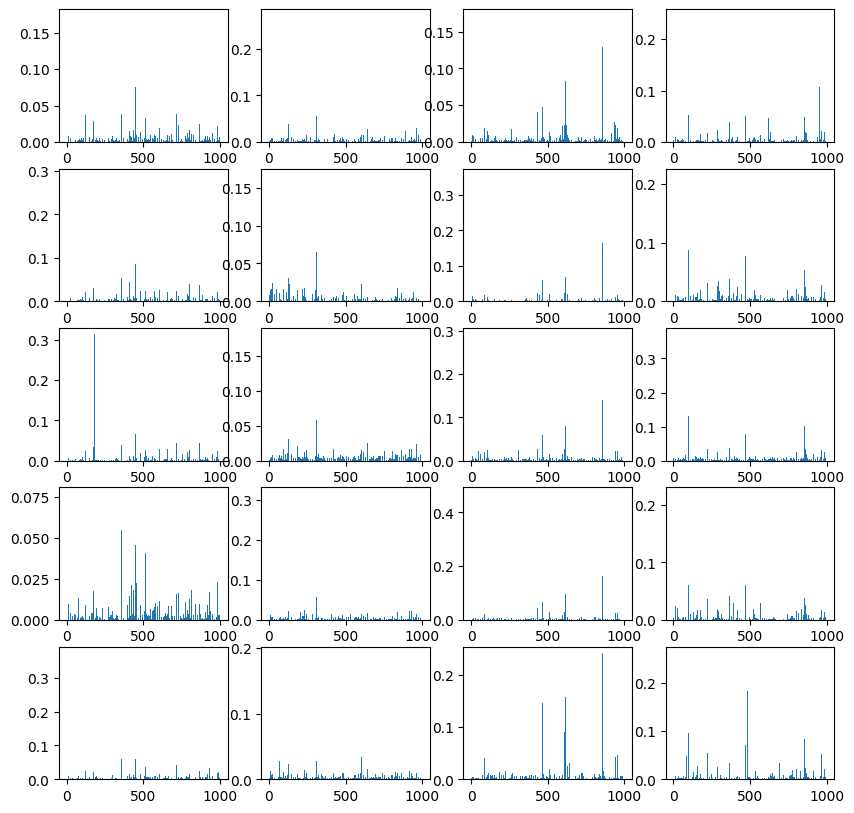

In [12]:
# Visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(Knewsgroups[0]):
    plt.subplot(5, 4, i + 1)
    plt.bar(range(1000), center)
plt.show()


In [13]:
# MNIST Dataset: 

# From torch vision
digits_train = torchvision.datasets.MNIST(root='./digits', train=True, download=True)
digits_test = torchvision.datasets.MNIST(root='./digits', train=False, download=True)
print(len(digits_train), len(digits_test))


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:02<00:00, 3615728.85it/s]


Extracting ./digits\MNIST\raw\train-images-idx3-ubyte.gz to ./digits\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 503017.61it/s]


Extracting ./digits\MNIST\raw\train-labels-idx1-ubyte.gz to ./digits\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2440100.48it/s]


Extracting ./digits\MNIST\raw\t10k-images-idx3-ubyte.gz to ./digits\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4480368.95it/s]

Extracting ./digits\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./digits\MNIST\raw

60000 10000


In [14]:
kdigits = kmeans(digits_train.data, 10, euclidean_distance)

100%|██████████| 10/10 [07:47<00:00, 46.71s/it]


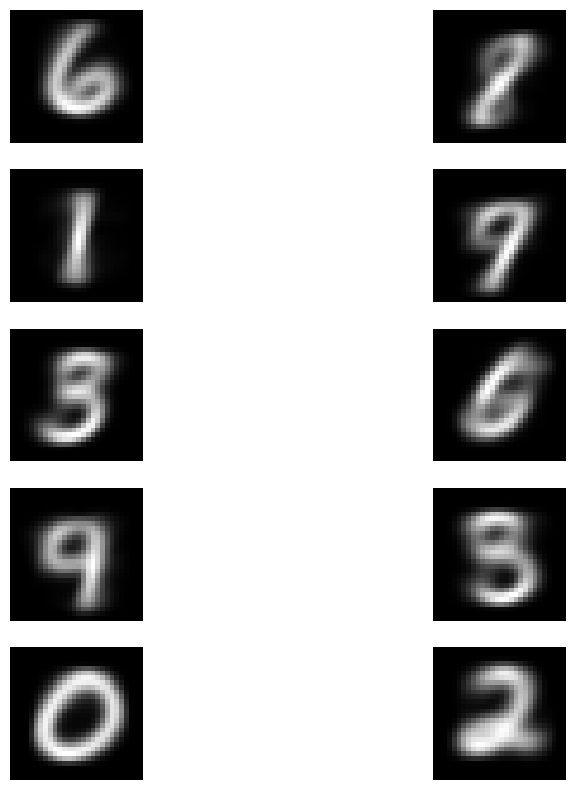

In [15]:
# visualize:
plt.figure(figsize=(10, 10))
for i, center in enumerate(kdigits[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [18]:
from scipy import softmax


In [23]:
# D) Run soft kmeans. Use K = 10. Try beta = 0.1, 1, 10. Evaluate performance. 

def soft_kmeans(data, k, beta, similarity, max_iter=10):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step
        memberships = np.zeros((data.shape[0], k))
        for j, x in enumerate(data):
            for c, center in enumerate(centers):
                memberships[j, c] = np.exp(-beta * similarity(x, center))
            memberships[j] /= memberships[j].sum()

        # Update cluster centers - M-step
        new_centers = np.zeros_like(centers)
        for c in range(k):
            new_centers[c] = np.average(data, axis=0, weights=memberships[:, c])

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers

    return centers, memberships
    

In [28]:
# Visualize:
soft_k_digits = soft_kmeans(digits_train.data, 10, 0.1, euclidean_distance)



100%|██████████| 10/10 [07:22<00:00, 44.26s/it]


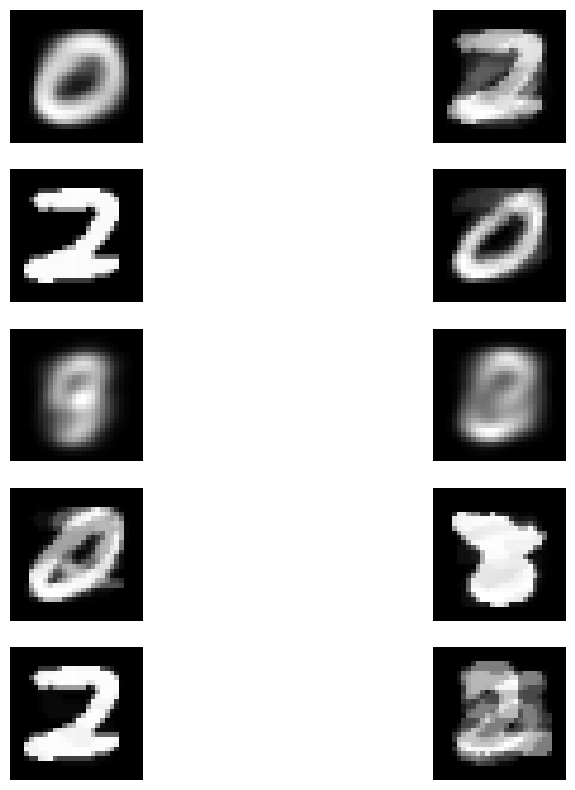

In [29]:
plt.figure(figsize=(10, 10))
for i, center in enumerate(soft_k_digits[0]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(center.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()